# <b>1 <span style='color:#0386f7de'>|</span> Introduction</b>
![](https://bankingfiles.com/wp-content/uploads/2019/09/190208-stock-money-fanned-out-ew-317p_fa445b2f6f3e86a3ffa18707e6a8adcb.fit-760w.jpg)
### Context
Salary Classification from various aspects (education, marital-status, occupation, race, and somemore..)
### Objective
Our goal here is to understand the data as much as possible , comparing different models of different companies, asking some
questions that will allow us to understand the data beter and predict if the salary whether less than 50K or greater than 50K ?
### Explanation of the variables of the dataset
1. age : continuous.
2. workclass:  a general term to represent the employment status of an individual
    - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt:  this is the number of people that census believes the entry represents
    - continuous.
4. education: Preschool , 1st-4th , 5th-6th , 7th-8th , 9th , 10th , 11th , 12th , HS-grad , Prof-school , Assoc-acdm , Assoc-voc , Some-college , Bachelors , Masters , Doctorate
5. education-num: a number that describe your education status from preschool to doctorate.
6. marital-status: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.
- Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: represents what this individual is relative to other
    - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15. salary: <=50K or >50K

# <b>2 <span style ='color:#0386f7de'>|</span> Importing Libraries</b>

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
sns.set_style("whitegrid")
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve,RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict


# <b>3 <span style ='color:#0386f7de'>|</span> Loading the data</b>

In [2]:
df = pd.read_csv('D:\Excel files\salary prediction classification\salary.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# <b>4 <span style ='color:#0386f7de'>|</span> Cleaning the data</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.1 | Basic data cleaning</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [3]:
counts = df.nunique()
counts

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

<b>fnlwgt</b> has that number of unique values because as i said above it represnt the number of people that have the same entry

In [4]:
df.drop_duplicates(inplace=True)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.2 | Outlier Identification and Removal
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [5]:
def remove_outlier_IQR(df):
    num_columns = [x for x in df.columns if df[x].dtype !=object]
    reduced_df=df[num_columns]
    Q1=reduced_df.quantile(0.25)
    Q3=reduced_df.quantile(0.75)
    IQR=Q3-Q1
    df_final_index=reduced_df[~((reduced_df<(Q1-1.5*IQR)) | (reduced_df>(Q3+1.5*IQR)))].index
    return df.loc[df_final_index.values]

In [6]:
df= remove_outlier_IQR(df)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.3 | Mark and Remove Missing Data
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [7]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

#### Sounds clean !

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.1 | Does the older get more money ?
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

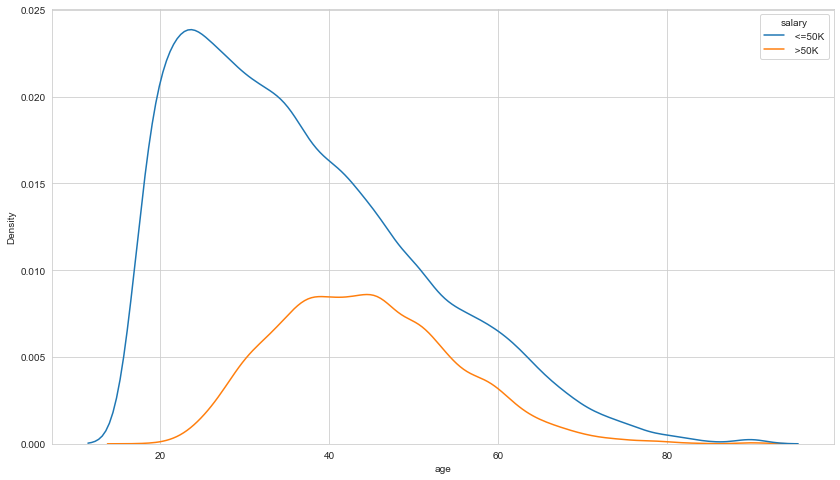

In [8]:
plt.figure(figsize=(14,8))
sns.kdeplot(data = df , x = 'age' ,hue='salary')
plt.show()

### what do you see and dose that make sence?
- not exactly, In the early twenties people start making more money till the peak at the forties, then starting gaining less money

### related questions ?
1. what is the jobs of those who are 80 years old ?
2. what is the jobs of those who are less than 20 years old and making more than 50K ?

In [9]:
df_old = df[(df.age >= 80)&(df['hours-per-week'] >=50)]
df_old

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,1816,60,United-States,<=50K
5370,90,Local-gov,227796,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
5406,90,Private,51744,Masters,14,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,50,United-States,>50K
6232,90,Self-emp-not-inc,155981,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,10566,0,50,United-States,<=50K
7481,83,Private,195507,HS-grad,9,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
10545,90,Private,175491,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K
11996,90,Private,40388,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,14,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,<=50K


#### Insight
- Opss ,We can see that the data has missing values  
- that dose not make sence to be more than 80 and being able to work more than 50 house per week!! 

In [10]:
df.replace(' ?' , np.nan ,inplace=True)
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
salary               0
dtype: int64

In [11]:
df.occupation.fillna(value='Other-service' , inplace=True)
df['native-country'].fillna(value='Other-country' , inplace=True)
df.workclass.fillna(value='Other' , inplace=True)
df.drop(df.loc[df_old.index].index,axis=0,inplace=True)

In [12]:
df_young = df[(df.age <=20)&(df['salary'] ==' >50K')]
df_young

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7741,19,Private,323605,7th-8th,4,Never-married,Other-service,Not-in-family,White,Male,0,0,60,United-States,>50K
22910,19,Other,200790,12th,8,Married-civ-spouse,Other-service,Other-relative,White,Female,15024,0,40,United-States,>50K


- because we don't have enough info about that occupation that give to 19 years-old more than 50K per year , iwill consider these two rows outliers

In [13]:
df.drop(df.loc[df_young.index].index,axis=0,inplace=True)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.2 | Does more education means more money ?
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

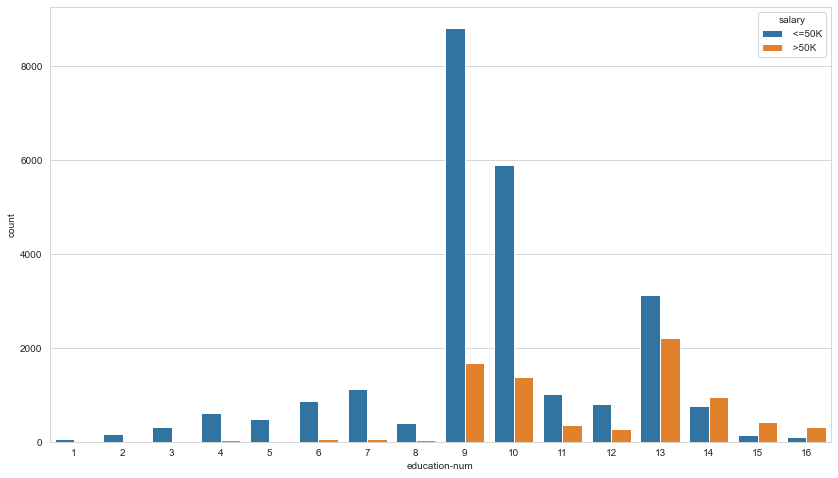

In [14]:
plt.figure(figsize=(14,8))
sns.countplot(data =df , x = 'education-num', hue = 'salary')
plt.show()

#### Insight
- that is true but you have to wait till reach educations-num 14(Bachelors) 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.3 | Does being man means more money ?
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [15]:
df_man_women=pd.get_dummies(df , columns=[  'salary'])
df_man_women=pd.pivot_table(df_man_women,  index='education-num',columns= 'sex',values=['salary_ <=50K' , 'salary_ >50K'],    
               aggfunc=np.sum).reset_index()
df_man_women['salary_ >50K'] = (df_man_women['salary_ >50K'] / (df_man_women['salary_ >50K']+ df_man_women['salary_ <=50K']))

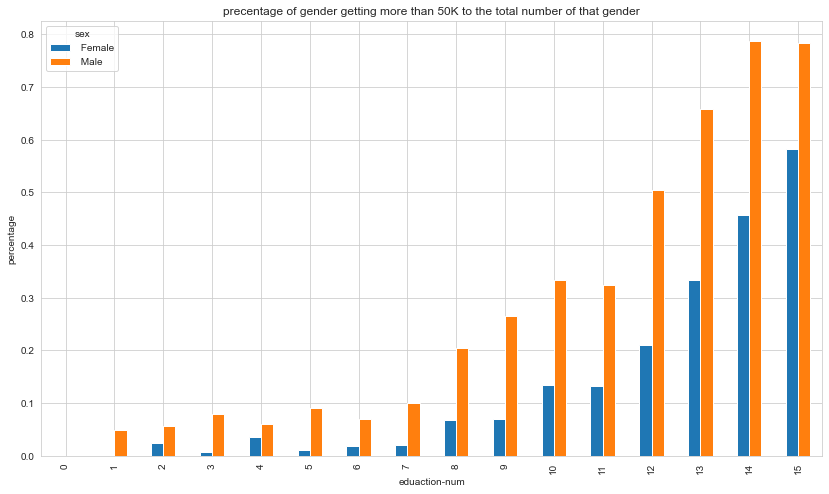

In [16]:
df_man_women['salary_ >50K'].plot(figsize=(14,8), kind = 'bar')
plt.title('precentage of gender getting more than 50K to the total number of that gender')
plt.xlabel('eduaction-num')
plt.ylabel('percentage')
plt.show()

### insight
- Unfortunately that is true, because the percentage of male is more than female for all education number

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.4 | which workclass that paying more money ?
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

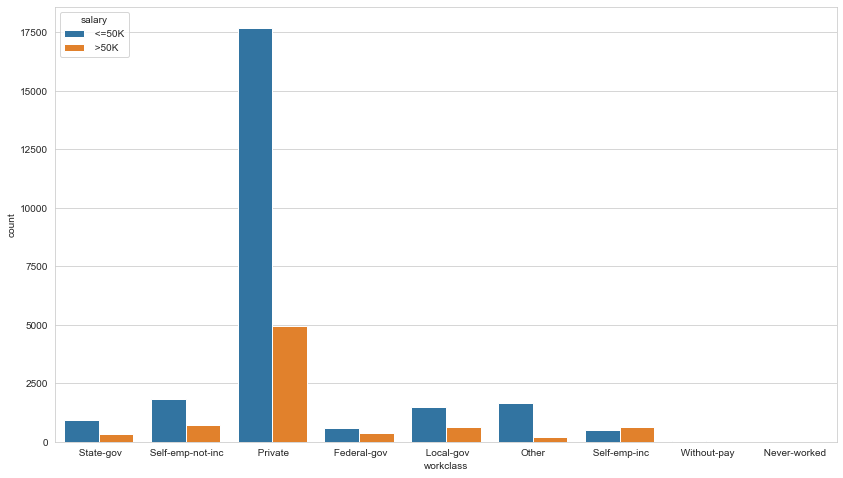

In [17]:
plt.figure(figsize=(14,8))
sns.countplot(data =df , x = 'workclass', hue = 'salary')
plt.show()

### insight
- private sector is dominates that market

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.5 |which race dominates the USA market ?
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


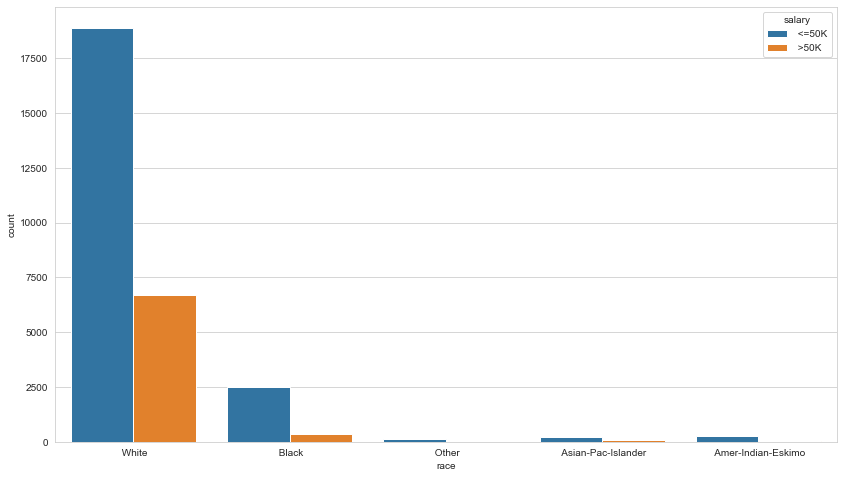

In [18]:
plt.figure(figsize=(14,8))
sns.countplot(data =df[df['native-country'] ==' United-States'] , x = 'race', hue = 'salary')
plt.show()

### insight
- white race is dominates the jobs

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>5.6 |which occupation dominates ?
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


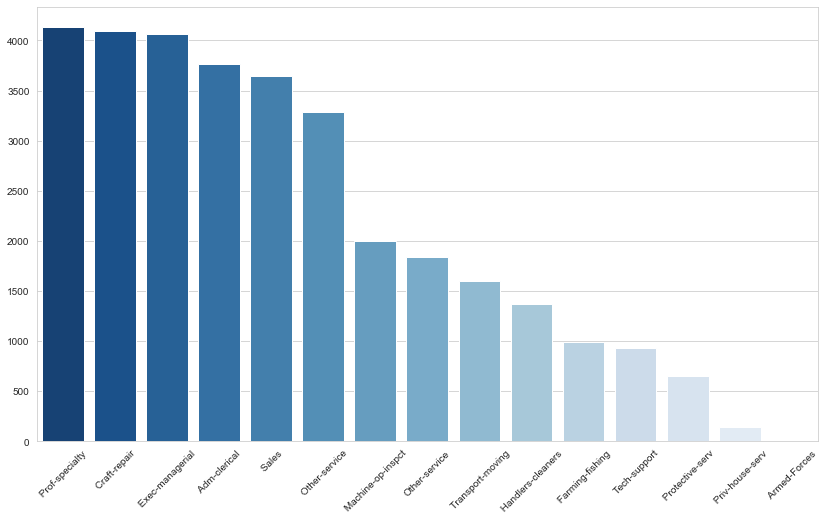

In [19]:
occupation = df['occupation'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(x =occupation.index , y =occupation.values ,palette="Blues_r" )
plt.xticks(rotation = 45)
plt.show()

# <b>6 <span style='color :#0386f7de'>| </span>  Data Preprocessing</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>6.1 | Creating Features
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


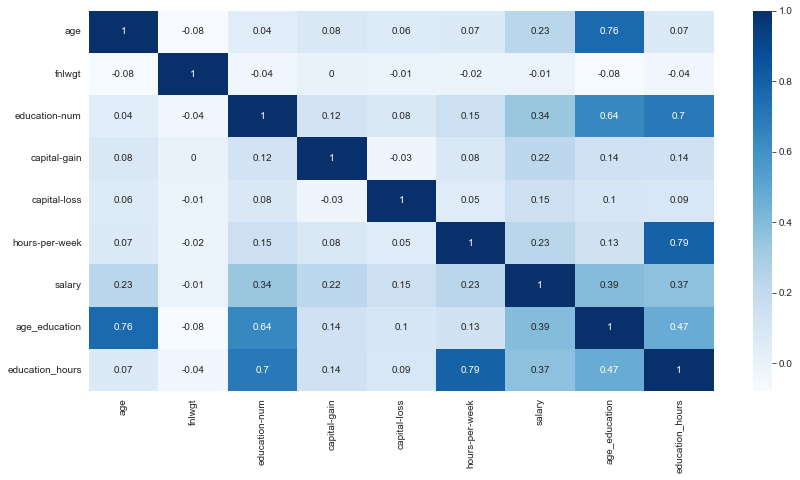

In [20]:
df['salary'] = df['salary'].map( {' >50K': 1, ' <=50K': 0} )
df['age_education'] = df['age'] * df['education-num']
df['education_hours'] = df['education-num'] * df['hours-per-week']
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues')
plt.show()

- Not bad!

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>6.2 | Handling Numerical Data (Normalise it)
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


In [21]:
from sklearn.preprocessing import StandardScaler
y = df['salary']
df.drop('salary' ,axis = 1 , inplace=True)
num_cols = [x for x in df.columns if df[x].dtype != 'object']
Scaler = StandardScaler()
df[num_cols] = Scaler.fit_transform(df[num_cols])

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>6.3 | Handling Categorical Data (Encoding it)
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

- because the numerical variable <b> education-num </b> represnt the categorical <b> education </b> ,so i will remove the categorical one

In [22]:
df.drop('education' ,axis = 1 , inplace=True)

In [23]:
df['native-country'].value_counts()

 United-States                 29137
 Mexico                          639
Other-country                    581
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [24]:
df['native-country'] =df['native-country'].apply(lambda x : x.strip())
cat_col = [x for x in df.columns if df[x].dtype == 'object']
df=pd.get_dummies(df , columns=cat_col , drop_first=True)

# <b>7 <span style='color :#0386f7de'>| </span>  Split Dataset for Training and Testing </b>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df , y , test_size=0.2 ,shuffle=True, random_state=41)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (26015, 87)
Shape of testing feature: (6504, 87)
Shape of training label: (26015,)
Shape of training label: (6504,)


# <b>8 <span style='color :#0386f7de'>| </span> Modeling </b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>8.1 | Searching for the ones that fit the best
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


In [26]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))

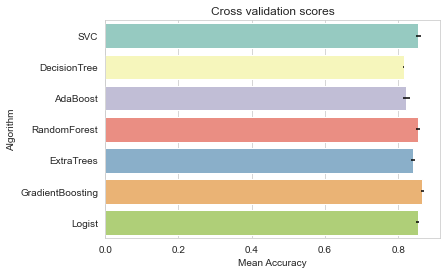

In [27]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier,X_train, y_train, scoring = "accuracy", cv =5, n_jobs=4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","Logist"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>8.2 | Tuning the top 3 classifiers
</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px


In [34]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
                'n_estimators' : [100,200,300],
                'learning_rate': [0.1, 0.05, 0.01],
                'max_depth': [4, 8],
                'min_samples_leaf': [100,150],
                'max_features': [0.3, 0.1]
}
gsGBC = RandomizedSearchCV(GBC,param_distributions = gb_param_grid, cv=5,scoring="accuracy", n_jobs=-1, verbose = 1)
gsGBC.fit(X_train, y_train)
GBC_best = gsGBC.best_estimator_
gsGBC.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8670766865270035

In [36]:
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "n_estimators" :[100,300],
    "criterion": ["gini"]}
gsRFC = RandomizedSearchCV(RFC,param_distributions = rf_param_grid, cv=5,scoring="accuracy", n_jobs=-1, verbose = 1)
gsRFC.fit(X_train , y_train)
RFC_best = gsRFC.best_estimator_
gsRFC.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8606573130886026

In [37]:
logC = LogisticRegression()
log_param_grid={'penalty':['l2','l1'] ,
                'dual':[True , False],
                'C':[0.01 , 0.1 , 1 , 1, 10 ]}
gslogC = RandomizedSearchCV(logC,param_distributions = log_param_grid, cv=5,scoring="accuracy", n_jobs=-1, verbose = 1)
gslogC.fit(X_train, y_train)
logC_best = gslogC.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [38]:
chosen_classifiers = [GBC_best, logC_best,RFC_best]

# <b>9 <span style='color :#0386f7de'>| </span> Comparison </b>

In [39]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
             'auc': auc, 'cm': cm}

In [40]:
GBC_eval =  evaluate_model(GBC_best, X_test, y_test)
print('Accuracy:', GBC_eval['acc'])
print('Precision:', GBC_eval['prec'])
print('Recall:', GBC_eval['rec'])
print('F1 Score:', GBC_eval['f1'])
print('Area Under Curve:', GBC_eval['auc'])
print('Confusion Matrix:\n', GBC_eval['cm'])

Accuracy: 0.8694649446494465
Precision: 0.7723823975720789
Recall: 0.6496490108487556
F1 Score: 0.7057192374350088
Area Under Curve: 0.9242404520312673
Confusion Matrix:
 [[4637  300]
 [ 549 1018]]


In [41]:
logC_best_eval =  evaluate_model(logC_best, X_test, y_test)
print('Accuracy:', logC_best_eval['acc'])
print('Precision:', logC_best_eval['prec'])
print('Recall:', logC_best_eval['rec'])
print('F1 Score:', logC_best_eval['f1'])
print('Area Under Curve:', logC_best_eval['auc'])
print('Confusion Matrix:\n', logC_best_eval['cm'])

Accuracy: 0.8510147601476015
Precision: 0.7317829457364341
Recall: 0.6024250159540523
F1 Score: 0.6608330416520826
Area Under Curve: 0.9058176417887721
Confusion Matrix:
 [[4591  346]
 [ 623  944]]


In [42]:
RFC_best_eval =  evaluate_model(RFC_best, X_test, y_test)
print('Accuracy:', RFC_best_eval['acc'])
print('Precision:', RFC_best_eval['prec'])
print('Recall:', RFC_best_eval['rec'])
print('F1 Score:', RFC_best_eval['f1'])
print('Area Under Curve:', RFC_best_eval['auc'])
print('Confusion Matrix:\n', RFC_best_eval['cm'])

Accuracy: 0.861469864698647
Precision: 0.7729508196721312
Recall: 0.6017868538608807
F1 Score: 0.6767133118048081
Area Under Curve: 0.9176221540096989
Confusion Matrix:
 [[4660  277]
 [ 624  943]]


How the models fit the data ?

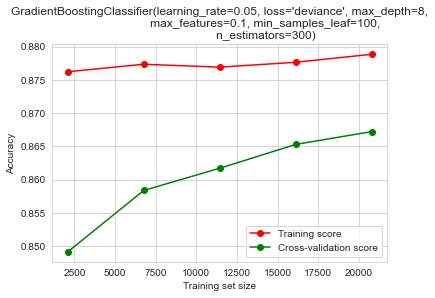

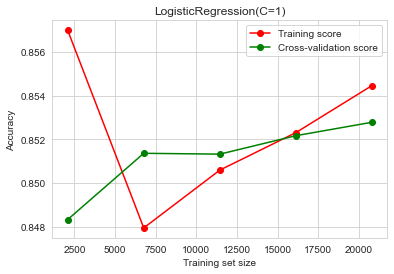

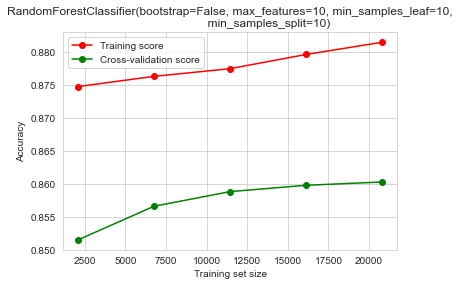

In [43]:
def plot_learning_curve(models , X , y):
        for model in models :
            train_sizes , train_scores , test_scores =learning_curve(model ,X , y , n_jobs=-1 )
            train_scores_mean = np.mean(train_scores ,axis = 1)
            test_scores_mean = np.mean(test_scores ,axis=1)
            plt.plot(train_sizes , train_scores_mean , 'o-' , color ='r' , label = 'Training score')
            plt.plot(train_sizes , test_scores_mean , 'o-' , color ='g' , label = 'Cross-validation score')
            plt.xlabel('Training set size')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.title(model)
            plt.show()
plot_learning_curve(chosen_classifiers , X_train , y_train)

#### insight 
    1- seems that if we added more data we will get higher accuracy
    2-i don't know what is the logestic is doing maybe not in the mode
    3-can you see that gab between the curves with RandomForest This means that the model performs significantly better on the training data than on the test data, which is the hall mark of an overfitting model. If you used a much larger training set

so we could say that the <b> GradientBoostingClassifier </b> is the one 

if you liked that note , smach the upvote button and leave a comment